In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
Years = ['19','20','21']

In [3]:
Data = pd.read_csv('DATA18.csv')

In [4]:
Data = Data[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE']]

In [5]:
Data = Data.loc[(Data['ZIP CODE']>=10000)&(Data['ZIP CODE']<11500)]

In [6]:
Data = Data.loc[Data['SALE PRICE']>0]

In [7]:
Data = Data.loc[Data['GROSS SQUARE FEET']>0]

In [8]:
Data = Data.groupby(by=['ZIP CODE']).sum()

In [9]:
Data

,GROSS SQUARE FEET,SALE PRICE
ZIP CODE,,
10001.0,2597992.0,1984479602
10002.0,692429.0,866811022
10003.0,883384.0,976085714
10004.0,855118.0,392215878
10005.0,167868.0,179803543
...,...,...
11432.0,660823.0,283290689
11433.0,856445.0,231747046
11434.0,1040897.0,335185342


In [10]:
Data['PPSQ18']=Data['SALE PRICE']/Data['GROSS SQUARE FEET']

In [11]:
Data.reset_index(inplace=True)
Data = Data.rename(columns = {'index':'ZIP CODE'})

In [12]:
Data = Data[['ZIP CODE','PPSQ18']]

In [13]:
Data

,ZIP CODE,PPSQ18
0,10001.0,763.851314
1,10002.0,1251.841015
2,10003.0,1104.939317
3,10004.0,458.668719
4,10005.0,1071.100764
...,...,...
172,11432.0,428.693749
173,11433.0,270.591861
174,11434.0,322.015859
175,11435.0,355.100343


In [14]:
FinData = Data

In [15]:
for year in Years:
    Data = pd.read_csv('DATA{0}.csv'.format(year))
    Data = Data[['ZIP CODE','GROSS SQUARE FEET','SALE PRICE']]
    Data = Data.loc[(Data['ZIP CODE']>=10000)&(Data['ZIP CODE']<11500)]
    Data = Data.loc[Data['SALE PRICE']>0]
    Data = Data.loc[Data['GROSS SQUARE FEET']>0]
    Data = Data.groupby(by=['ZIP CODE']).sum()
    Data['PPSQ{0}'.format(year)]=Data['SALE PRICE']/Data['GROSS SQUARE FEET']
    Data.reset_index(inplace=True)
    Data = Data.rename(columns = {'index':'ZIP CODE'})
    Data = Data[['ZIP CODE','PPSQ{0}'.format(year)]]
    FinData = FinData.merge(Data, left_on='ZIP CODE', right_on='ZIP CODE')

In [16]:
FinData

,ZIP CODE,PPSQ18,PPSQ19,PPSQ20,PPSQ21
0,10001.0,763.851314,486.913853,710.073505,623.336857
1,10002.0,1251.841015,518.364589,659.132917,816.708254
2,10003.0,1104.939317,628.610161,1173.363406,1134.362144
3,10007.0,722.779138,258.917370,358.905300,1453.698382
4,10009.0,878.952433,345.237815,10.501940,728.660589
...,...,...,...,...,...
162,11432.0,428.693749,368.577922,409.768086,485.386658
163,11433.0,270.591861,316.215771,282.657708,380.638863
164,11434.0,322.015859,582.748498,342.323661,396.171005
165,11435.0,355.100343,334.841572,142.758490,448.396448


In [17]:
FinData['CHANGE 18-19']=((FinData['PPSQ19']-FinData['PPSQ18'])/FinData['PPSQ18'])*100

In [18]:
FinData

,ZIP CODE,PPSQ18,PPSQ19,PPSQ20,PPSQ21,CHANGE 18-19
0,10001.0,763.851314,486.913853,710.073505,623.336857,-36.255415
1,10002.0,1251.841015,518.364589,659.132917,816.708254,-58.591819
2,10003.0,1104.939317,628.610161,1173.363406,1134.362144,-43.109078
3,10007.0,722.779138,258.917370,358.905300,1453.698382,-64.177526
4,10009.0,878.952433,345.237815,10.501940,728.660589,-60.721673
...,...,...,...,...,...,...
162,11432.0,428.693749,368.577922,409.768086,485.386658,-14.023024
163,11433.0,270.591861,316.215771,282.657708,380.638863,16.860784
164,11434.0,322.015859,582.748498,342.323661,396.171005,80.968881
165,11435.0,355.100343,334.841572,142.758490,448.396448,-5.705084


In [19]:
FinData['CHANGE 19-20']=((FinData['PPSQ20']-FinData['PPSQ19'])/FinData['PPSQ19'])*100

In [20]:
FinData['CHANGE 20-21']=((FinData['PPSQ21']-FinData['PPSQ20'])/FinData['PPSQ20'])*100

In [21]:
FinData

,ZIP CODE,PPSQ18,PPSQ19,PPSQ20,PPSQ21,CHANGE 18-19,CHANGE 19-20,CHANGE 20-21
0,10001.0,763.851314,486.913853,710.073505,623.336857,-36.255415,45.831444,-12.215165
1,10002.0,1251.841015,518.364589,659.132917,816.708254,-58.591819,27.156239,23.906458
2,10003.0,1104.939317,628.610161,1173.363406,1134.362144,-43.109078,86.659949,-3.323886
3,10007.0,722.779138,258.917370,358.905300,1453.698382,-64.177526,38.617699,305.036756
4,10009.0,878.952433,345.237815,10.501940,728.660589,-60.721673,-96.958056,6838.342679
...,...,...,...,...,...,...,...,...
162,11432.0,428.693749,368.577922,409.768086,485.386658,-14.023024,11.175429,18.453993
163,11433.0,270.591861,316.215771,282.657708,380.638863,16.860784,-10.612394,34.664243
164,11434.0,322.015859,582.748498,342.323661,396.171005,80.968881,-41.257050,15.729951
165,11435.0,355.100343,334.841572,142.758490,448.396448,-5.705084,-57.365362,214.094417


In [22]:
CoolData = FinData

In [23]:
cols = ['PPSQ18', 'PPSQ19', 'PPSQ20', 'PPSQ21', 'CHANGE 18-19','CHANGE 19-20', 'CHANGE 20-21']

In [24]:
for col in cols:
    CoolData['{0}_norm'.format(col)]= (CoolData['{0}'.format(col)] - CoolData['{0}'.format(col)].min()) / (CoolData['{0}'.format(col)].max() - CoolData['{0}'.format(col)].min())

In [25]:
CoolData

,ZIP CODE,PPSQ18,PPSQ19,PPSQ20,PPSQ21,CHANGE 18-19,CHANGE 19-20,CHANGE 20-21,PPSQ18_norm,PPSQ19_norm,PPSQ20_norm,PPSQ21_norm,CHANGE 18-19_norm,CHANGE 19-20_norm,CHANGE 20-21_norm
0,10001.0,763.851314,486.913853,710.073505,623.336857,-36.255415,45.831444,-12.215165,0.257809,0.269448,0.391048,0.264133,0.259244,0.242342,0.008869
1,10002.0,1251.841015,518.364589,659.132917,816.708254,-58.591819,27.156239,23.906458,0.452290,0.287650,0.362876,0.348697,0.159316,0.210647,0.014095
2,10003.0,1104.939317,628.610161,1173.363406,1134.362144,-43.109078,86.659949,-3.323886,0.393744,0.351453,0.647265,0.487612,0.228583,0.311637,0.010155
3,10007.0,722.779138,258.917370,358.905300,1453.698382,-64.177526,38.617699,305.036756,0.241440,0.137499,0.196838,0.627262,0.134327,0.230099,0.054768
4,10009.0,878.952433,345.237815,10.501940,728.660589,-60.721673,-96.958056,6838.342679,0.303681,0.187456,0.004158,0.310193,0.149788,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,11432.0,428.693749,368.577922,409.768086,485.386658,-14.023024,11.175429,18.453993,0.124237,0.200963,0.224967,0.203805,0.358707,0.183524,0.013306
163,11433.0,270.591861,316.215771,282.657708,380.638863,16.860784,-10.612394,34.664243,0.061228,0.170659,0.154670,0.157998,0.496874,0.146546,0.015651
164,11434.0,322.015859,582.748498,342.323661,396.171005,80.968881,-41.257050,15.729951,0.081722,0.324911,0.187668,0.164790,0.783680,0.094536,0.012912
165,11435.0,355.100343,334.841572,142.758490,448.396448,-5.705084,-57.365362,214.094417,0.094908,0.181439,0.077301,0.187629,0.395920,0.067197,0.041611


In [26]:
import geopandas as gpd

In [27]:
NYCzip=gpd.read_file("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/NY.geojson")

In [28]:
NYCzip.head() #geopandas looks pretty much like pandas dataframe including both - labels/parameters and geometry - of the shapes

,zipcode,geometry
0,11372.0,"POLYGON Z ((-73.86942 40.74916 0.00000, -73.89..."
1,11004.0,"POLYGON Z ((-73.71068 40.75004 0.00000, -73.70..."
2,11040.0,"POLYGON Z ((-73.70098 40.73890 0.00000, -73.70..."
3,11426.0,"POLYGON Z ((-73.72270 40.75373 0.00000, -73.72..."
4,11365.0,"POLYGON Z ((-73.81089 40.72717 0.00000, -73.81..."


In [29]:
NYCzip = NYCzip.loc[(NYCzip['zipcode']>=10000)&(NYCzip['zipcode']<11500)]

<AxesSubplot: >

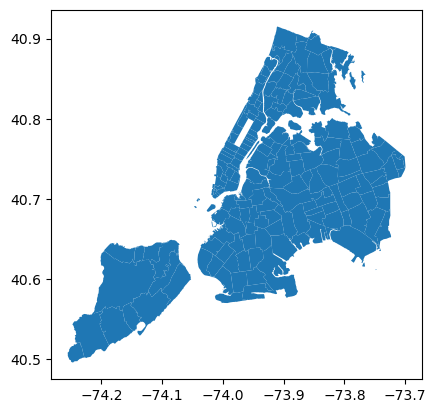

In [30]:
NYCzip.plot()

In [31]:
NYCzip.count

<bound method DataFrame.count of      zipcode                                           geometry
0    11372.0  POLYGON Z ((-73.86942 40.74916 0.00000, -73.89...
1    11004.0  POLYGON Z ((-73.71068 40.75004 0.00000, -73.70...
2    11040.0  POLYGON Z ((-73.70098 40.73890 0.00000, -73.70...
3    11426.0  POLYGON Z ((-73.72270 40.75373 0.00000, -73.72...
4    11365.0  POLYGON Z ((-73.81089 40.72717 0.00000, -73.81...
..       ...                                                ...
257  10065.0  POLYGON Z ((-73.95232 40.76454 0.00000, -73.95...
258  10075.0  POLYGON Z ((-73.94908 40.76828 0.00000, -73.95...
259  10069.0  POLYGON Z ((-73.98821 40.78123 0.00000, -73.98...
260  10281.0  POLYGON Z ((-74.01468 40.70980 0.00000, -74.01...
261  10282.0  POLYGON Z ((-74.01323 40.71832 0.00000, -74.01...

[253 rows x 2 columns]>

In [32]:
Result = NYCzip.merge(FinData,left_on='zipcode',right_on='ZIP CODE')

In [33]:
Result

,zipcode,geometry,ZIP CODE,PPSQ18,PPSQ19,PPSQ20,PPSQ21,CHANGE 18-19,CHANGE 19-20,CHANGE 20-21,PPSQ18_norm,PPSQ19_norm,PPSQ20_norm,PPSQ21_norm,CHANGE 18-19_norm,CHANGE 19-20_norm,CHANGE 20-21_norm
0,11372.0,"POLYGON Z ((-73.86942 40.74916 0.00000, -73.89...",11372.0,645.556823,438.136469,611.051843,390.741273,-32.130457,39.466099,-36.054317,0.210664,0.241219,0.336285,0.162416,0.277699,0.231539,0.005420
1,11004.0,"POLYGON Z ((-73.71068 40.75004 0.00000, -73.70...",11004.0,464.340028,515.643368,519.204547,535.543210,11.048658,0.690628,3.146864,0.138443,0.286075,0.285490,0.225740,0.470872,0.165729,0.011091
2,11040.0,"POLYGON Z ((-73.70098 40.73890 0.00000, -73.70...",11040.0,518.006233,490.344911,524.646634,567.703006,-5.339959,6.995428,8.206738,0.159831,0.271434,0.288500,0.239804,0.397553,0.176430,0.011823
3,11426.0,"POLYGON Z ((-73.72270 40.75373 0.00000, -73.72...",11426.0,436.558998,442.076808,482.950316,501.973804,1.263932,9.245793,3.939016,0.127372,0.243500,0.265440,0.211059,0.427098,0.180249,0.011206
4,11365.0,"POLYGON Z ((-73.81089 40.72717 0.00000, -73.81...",11365.0,554.882729,554.195526,533.917156,572.057408,-0.123847,-3.659064,7.143478,0.174528,0.308387,0.293626,0.241708,0.420889,0.158347,0.011669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,10307.0,"POLYGON Z ((-74.24967 40.51555 0.00000, -74.24...",10307.0,306.199700,307.525960,317.014918,319.724623,0.433136,3.085580,0.854756,0.075419,0.165630,0.173671,0.131359,0.423381,0.169794,0.010760
168,10019.0,"POLYGON Z ((-73.99310 40.77273 0.00000, -73.98...",10019.0,1174.646372,285.677659,291.858127,614.108646,-75.679688,2.163441,110.413413,0.421525,0.152986,0.159759,0.260097,0.082869,0.168229,0.026610
169,10022.0,"POLYGON Z ((-73.97255 40.76490 0.00000, -73.96...",10022.0,1262.893458,999.835493,93.932870,278.044116,-20.829783,-90.605168,196.003004,0.456694,0.566294,0.050298,0.113131,0.328255,0.010782,0.038993
170,10065.0,"POLYGON Z ((-73.95232 40.76454 0.00000, -73.95...",10065.0,1956.249592,347.805724,551.130569,519.128562,-82.220790,58.459315,-5.806611,0.733021,0.188942,0.303146,0.218561,0.053605,0.263774,0.009796


KeyError: 'CHANGE 20-21 (%)'

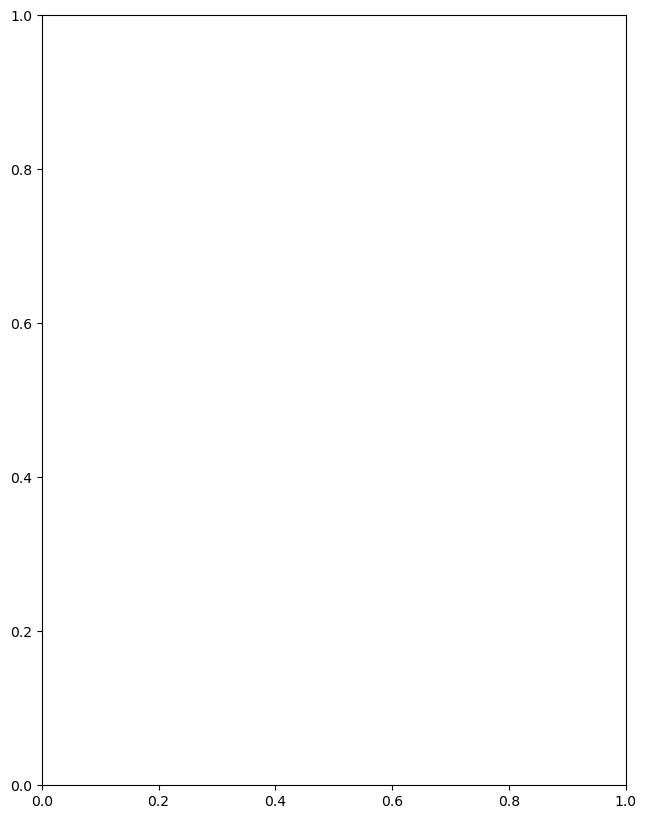

In [34]:
#Result.plot(figsize = (10,10), column='CHANGE 20-21 (%)', legend=False)

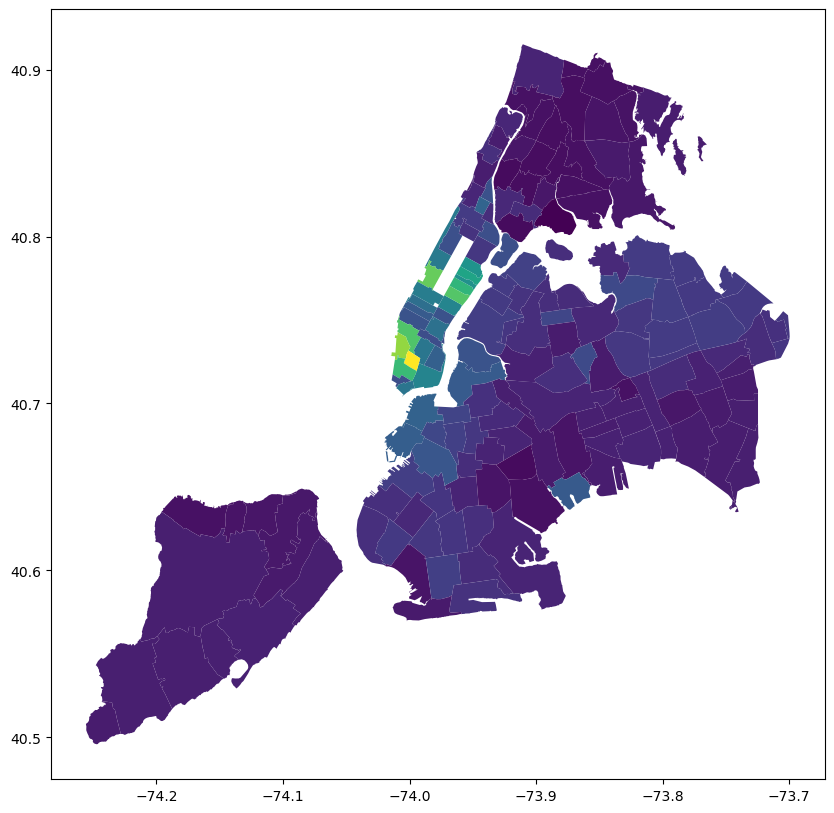

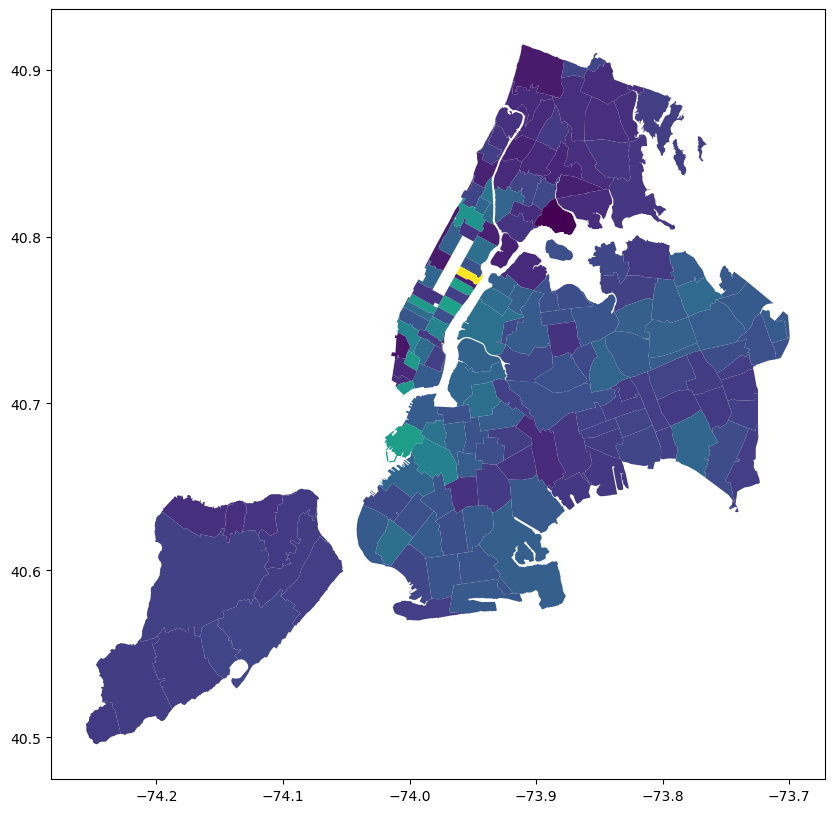

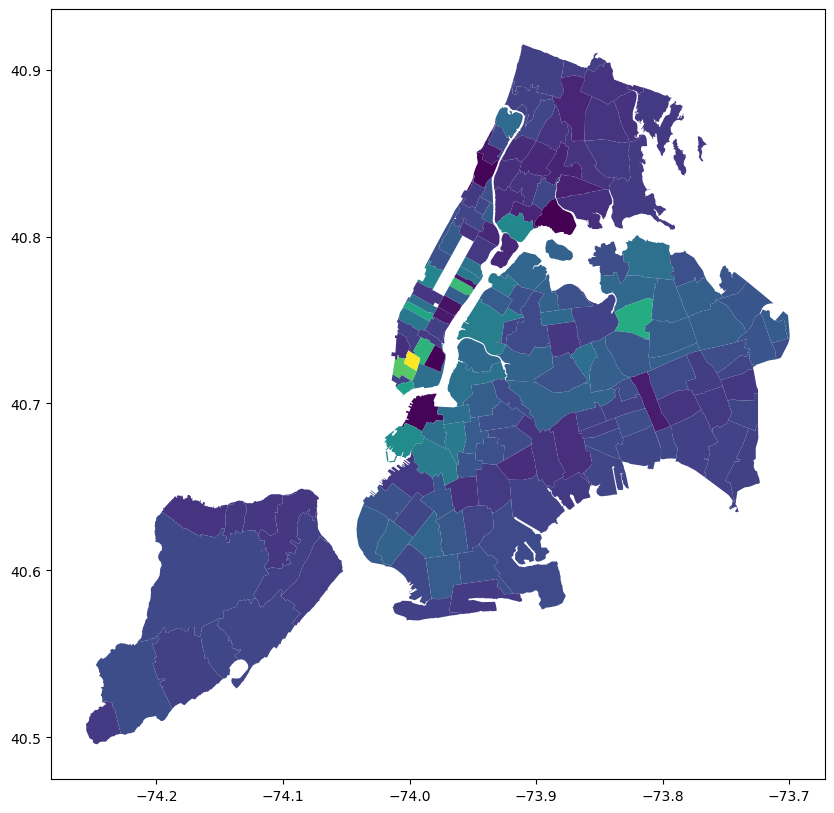

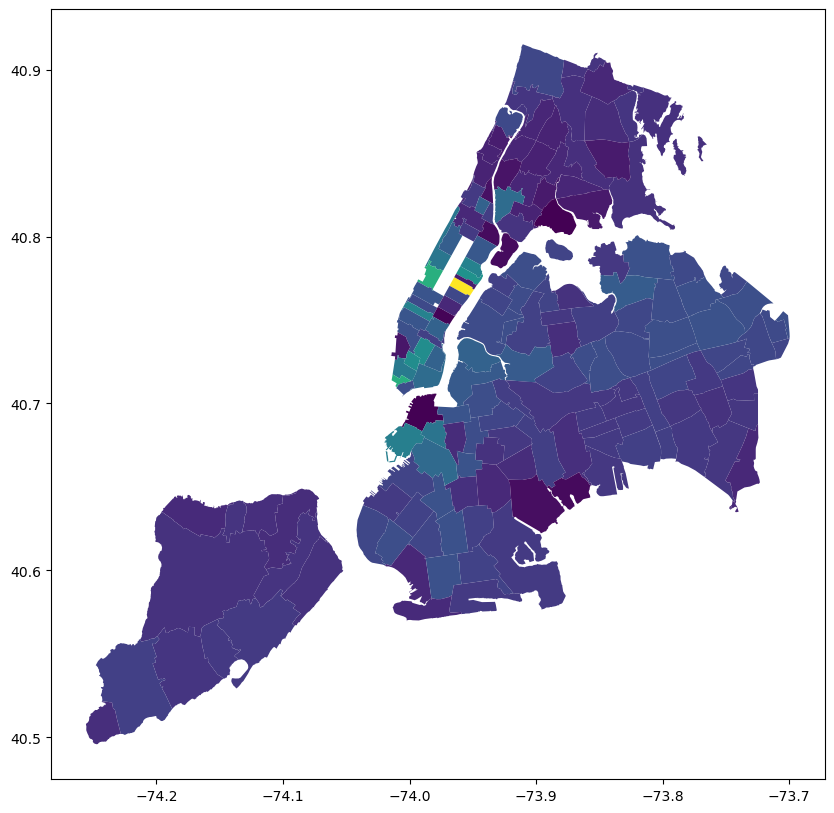

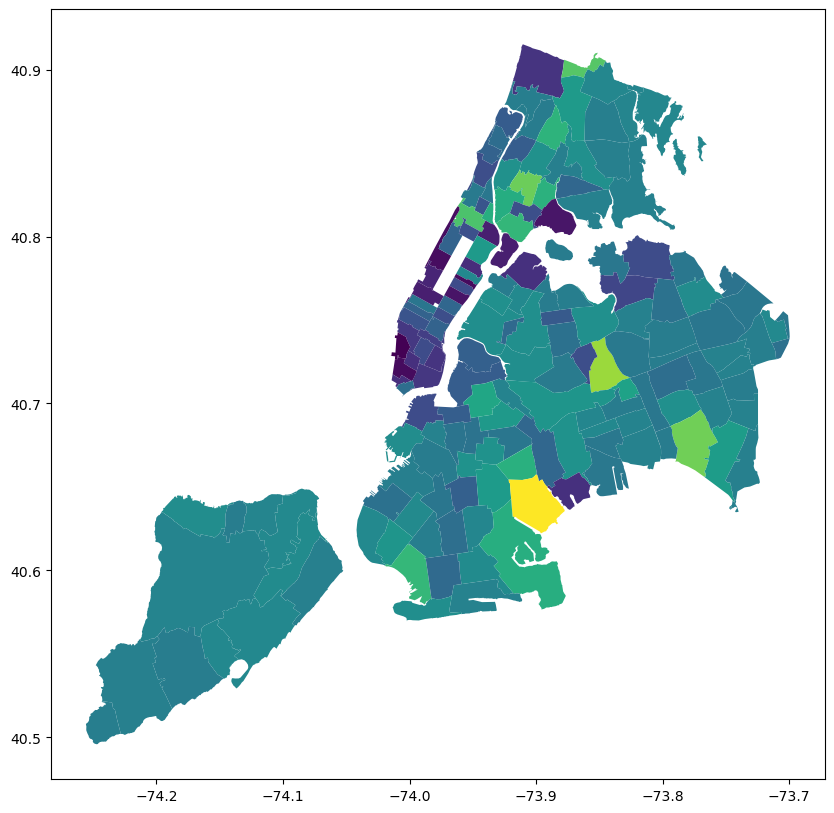

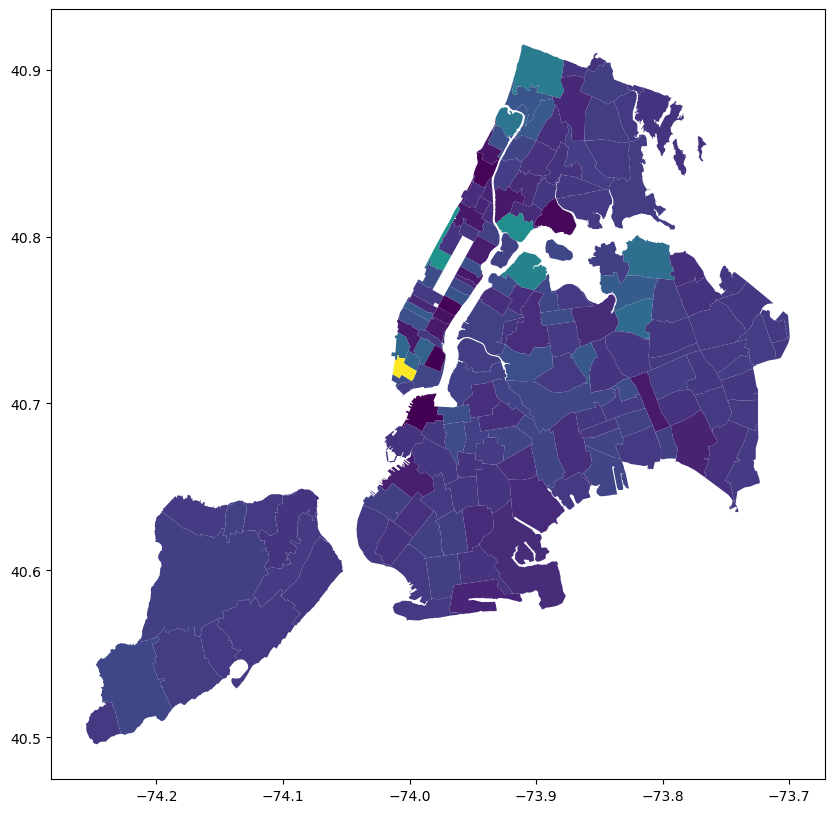

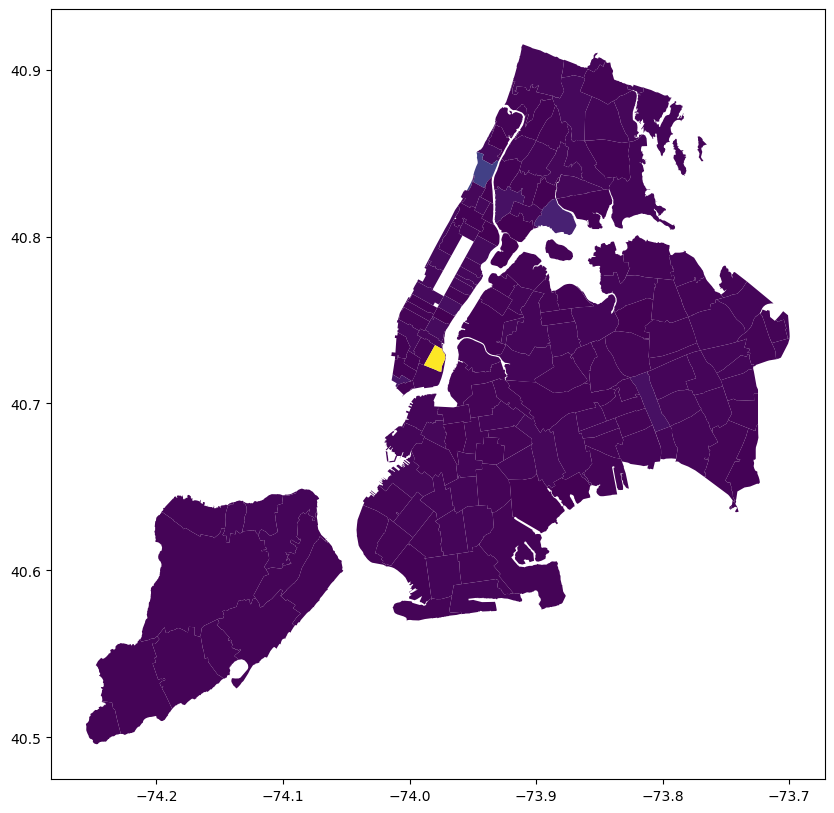

In [35]:
# Time to Visualize Columns:
for col in cols:
    Result.plot(figsize = (10,10), column='{0}_norm'.format(col), legend=False)